<a href="https://colab.research.google.com/github/yashx007/ML/blob/main/A2_Brain_Weight_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully. First 5 rows:
   Body_Weight  Brain_Weight
0          1.2           120
1          5.5           300
2          3.3           200
3          8.1           450
4         10.5           500

Missing values:
 Body_Weight     0
Brain_Weight    0
dtype: int64

Sample of log-transformed data:
X (Log Body Weight): [0.78845736 1.87180218 1.45861502 2.20827441 2.44234704]
y (Log Brain Weight): [4.79579055 5.70711026 5.30330491 6.11146734 6.2166061 ]

Fold 1: Training size = 8, Validation size = 2
Fold 1 Model Coefficients: [0.99419987], Intercept: -5.007272623641185e-16
Fold 1 R2: 1.00, MSE: 0.0001, MAE: 0.0109

Fold 2: Training size = 8, Validation size = 2
Fold 2 Model Coefficients: [0.99173696], Intercept: -2.7296884551531788e-17
Fold 2 R2: 0.99, MSE: 0.0042, MAE: 0.0549

Fold 3: Training size = 8, Validation size = 2
Fold 3 Model Coefficients: [0.99486738], Intercept: 5.010249490774671e-16
Fold 3 R2: 0.98, MSE: 0.0029, MAE: 0.0533

Fold 4: Training size = 8, Val

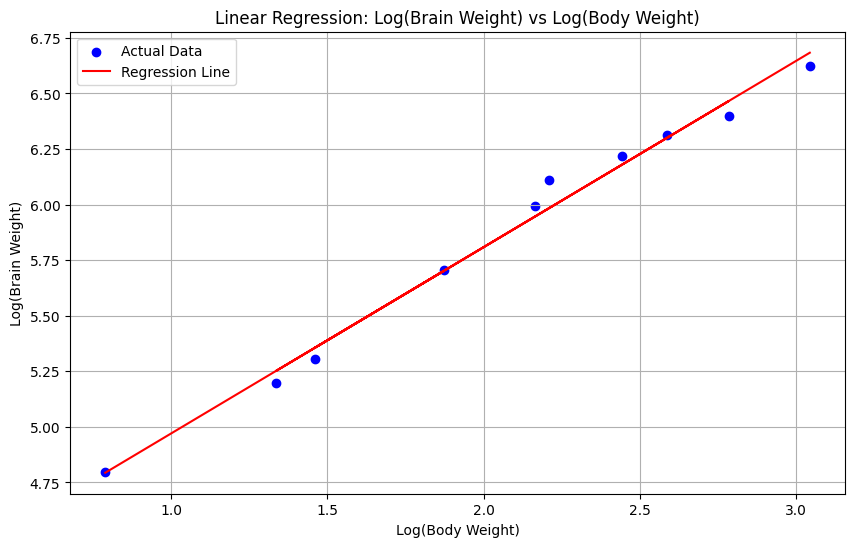

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/animal_brain_body.csv'  # Update this path as per your environment
data = pd.read_csv(file_path)
print("Dataset loaded successfully. First 5 rows:")
print(data.head())

# Check for null values
print("\nMissing values:\n", data.isnull().sum())

# Log-transform the data
X = np.log1p(data['Body_Weight'].values).reshape(-1, 1)
y = np.log1p(data['Brain_Weight'].values)

print("\nSample of log-transformed data:")
print("X (Log Body Weight):", X[:5].flatten())
print("y (Log Brain Weight):", y[:5].flatten())

# Initialize K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
r2_scores, mse_scores, mae_scores = [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    print(f"\nFold {fold}: Training size = {len(train_idx)}, Validation size = {len(val_idx)}")

    # Standardize features and target
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_val_scaled = scaler_X.transform(X_val)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

    # Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train_scaled)

    print(f"Fold {fold} Model Coefficients: {model.coef_}, Intercept: {model.intercept_}")

    # Predict and inverse transform
    y_pred_scaled = model.predict(X_val_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    # Evaluate
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)

    print(f"Fold {fold} R2: {r2:.2f}, MSE: {mse:.4f}, MAE: {mae:.4f}")

    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

# Print average metrics
print(f"\nAverage Metrics across {k}-Fold CV:")
print(f"R2 Score: {np.mean(r2_scores):.2f}")
print(f"MSE: {np.mean(mse_scores):.4f}")
print(f"MAE: {np.mean(mae_scores):.4f}")

# Final model on entire dataset for visualization
scaler_X_final = StandardScaler()
scaler_y_final = StandardScaler()
X_scaled = scaler_X_final.fit_transform(X)
y_scaled = scaler_y_final.fit_transform(y.reshape(-1, 1)).ravel()

final_model = LinearRegression()
final_model.fit(X_scaled, y_scaled)

print("\nFinal Model Coefficients:", final_model.coef_)
print("Final Model Intercept:", final_model.intercept_)

# Predict for plotting
y_pred_final = scaler_y_final.inverse_transform(
    final_model.predict(X_scaled).reshape(-1, 1)
).ravel()

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_final, color='red', label='Regression Line')
plt.title('Linear Regression: Log(Brain Weight) vs Log(Body Weight)')
plt.xlabel('Log(Body Weight)')
plt.ylabel('Log(Brain Weight)')
plt.legend()
plt.grid(True)
plt.show()